In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy import integrate
from scipy.stats import linregress
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
#Constants
a=6371220 #radius of earth in m
L=2.5E6 #Latent heat in atmosphere
L_ice=3.34e5 #Latent heat of fusion
g=9.81 #Acceleration from gravity
conv_pw=1e15 #Conversion from watts to PW
cp=1007  

In [3]:
#Make some standardized coordinates

lats = np.arange(-90, 91, 1)
geometry = 2 * np.pi * np.cos(np.deg2rad(np.asarray(lats))) * a / g
levels_pa = np.array([100, 500, 1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000,
             70000, 85000, 92500, 100000])
levels_hPa = levels_pa / 100

In [4]:
amip_ds = xr.open_dataset('../amip_aht.nc')
hist_ds = xr.open_dataset('../hist_aht.nc')
reanalysis_ds = xr.open_dataset('../reanalysis_aht.nc')

amip_trends = amip_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)
hist_trends = hist_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)
reanalysis_trends = reanalysis_ds.groupby('time.year').mean('time').polyfit(dim = 'year', deg = 1, cov=True)

In [5]:
def trend(x):
    return x.polyfit('time', deg=1)

amip_trends_month = amip_ds.groupby('time.month').apply(trend) * 1e9 * 3600 * 24 * 365 * 40 / 1e15
hist_trends_month = hist_ds.groupby('time.month').apply(trend)  * 1e9 * 3600 * 24 * 365 * 40 / 1e15
reanalysis_trends_month = reanalysis_ds.groupby('time.month').apply(trend)  * 1e9 * 3600 * 24 * 365 * 40 / 1e15

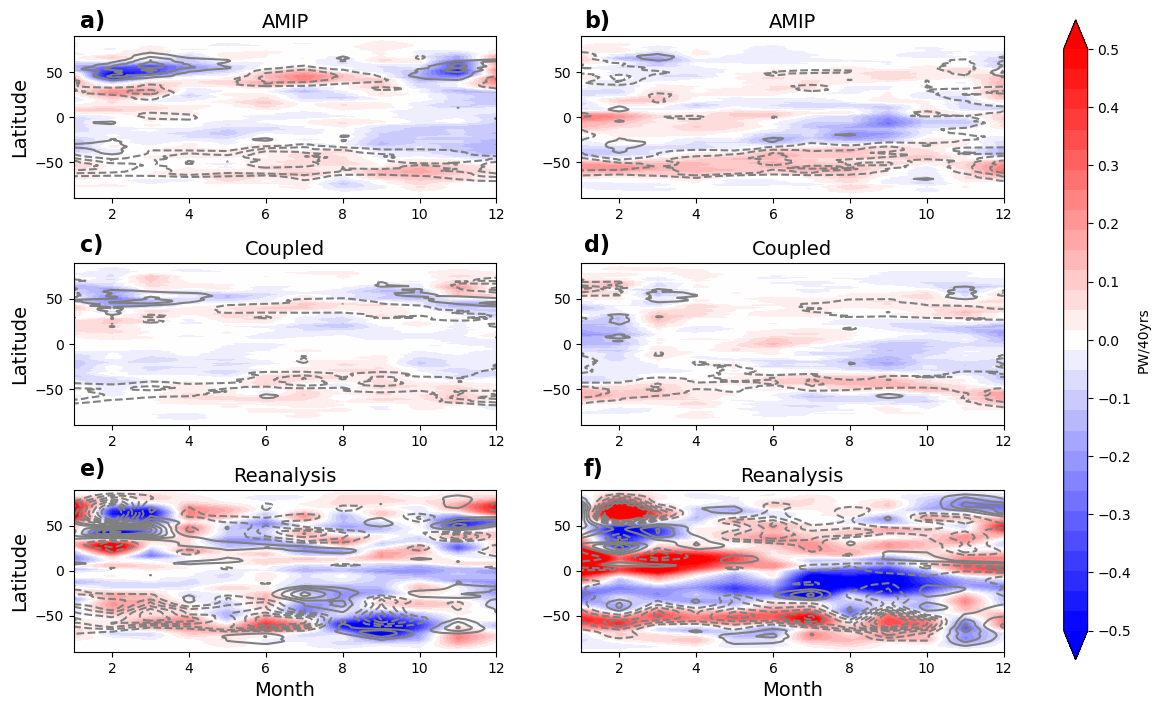

In [7]:
field1 = 'te_aht_polyfit_coefficients'
field2 = 'se_aht_polyfit_coefficients'

field3 = 'eddy_aht_polyfit_coefficients'
field4 = 'mmc_aht_polyfit_coefficients'

mmc_levels = [-0.7, -0.6, -0.5, -.4, -.3, -0.2, -0.1, 0.1, 0.2, .3, .4, .5, .6, .7]

eddy_levels = np.linspace(-0.5, 0.5, 30)

fig, axs = plt.subplots(3, 2,  figsize=(12, 8))

axs[0,0].contour(range(1,13), lats, amip_trends_month[field1].sel(degree=1).median('model').T,
             levels=mmc_levels,  colors='grey')

axs[0,0].contourf(range(1,13), lats, amip_trends_month[field2].sel(degree=1).median('model').T,
             levels=eddy_levels, extend='both', cmap='bwr')

#plt.colorbar(label='PW/40yrs')
axs[0,0].set_title('AMIP', fontsize=14)
#axs[0,0].set_xlabel('Month')
axs[0,0].set_ylabel('Latitude', fontsize=14)

axs[0,1].contour(range(1,13), lats, amip_trends_month[field3].sel(degree=1).median('model').T,
             levels=mmc_levels,  colors='grey')

axs[0,1].contourf(range(1,13), lats, amip_trends_month[field4].sel(degree=1).median('model').T,
             levels=eddy_levels, extend='both', cmap='bwr')

#plt.colorbar(label='PW/40yrs')
axs[0,1].set_title('AMIP', fontsize=14)
#axs[0,1].set_xlabel('Month')
#axs[0,1].set_ylabel('Latitude')


axs[1,0].contour(range(1,13), lats, hist_trends_month[field1].sel(degree=1).median('model').T,
             levels=mmc_levels,  colors='grey')

contf = axs[1,0].contourf(range(1,13), lats, hist_trends_month[field2].sel(degree=1).median('model').T,
             levels=eddy_levels, extend='both', cmap='bwr')

#plt.colorbar(label='PW/40yrs')
axs[1,0].set_title('Coupled', fontsize=14)
#axs[1,1].set_xlabel('Month')
axs[1,0].set_ylabel('Latitude', fontsize=14)

axs[1,1].contour(range(1,13), hist_trends_month.latitude, hist_trends_month[field3].sel(degree=1).median('model').T,
             levels=mmc_levels,  colors='grey')

contf = axs[1,1].contourf(range(1,13), hist_trends_month.latitude, hist_trends_month[field4].sel(degree=1).median('model').T,
             levels=eddy_levels, extend='both', cmap='bwr')

#plt.colorbar(label='PW/40yrs')
axs[1,1].set_title('Coupled', fontsize=14)
#axs[1,0].set_xlabel('Month')
#axs[1,1].set_ylabel('Latitude', fontsize=14)

axs[2,0].contour(range(1,13), reanalysis_trends_month.latitude, reanalysis_trends_month[field1].sel(degree=1).median('model').T,
             levels=mmc_levels,  colors='grey')

contf = axs[2,0].contourf(range(1,13), reanalysis_trends_month.latitude, reanalysis_trends_month[field2].sel(degree=1).median('model').T,
             levels=eddy_levels, extend='both', cmap='bwr')

#plt.colorbar(label='PW/40yrs')
axs[2,0].set_title('Reanalysis', fontsize=14)
axs[2,0].set_xlabel('Month', fontsize=14)
axs[2,0].set_ylabel('Latitude', fontsize=14)

axs[2,1].contour(range(1,13), reanalysis_trends_month.latitude, reanalysis_trends_month[field3].sel(degree=1).mean('model').T,
             levels=mmc_levels,  colors='grey')

contf = axs[2,1].contourf(range(1,13), reanalysis_trends_month.latitude, reanalysis_trends_month[field4].sel(degree=1).mean('model').T,
             levels=eddy_levels, extend='both', cmap='bwr')

#plt.colorbar(label='PW/40yrs')
axs[2,1].set_title('Reanalysis', fontsize=14)
axs[2,1].set_xlabel('Month', fontsize=14)
#axs[2,1].set_ylabel('Latitude', fontsize=14)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
fig.colorbar(contf, cax=cbar_ax, ticks=np.arange(-0.7, 0.8, .1), label='PW/40yrs')

#fig.suptitle('           TE AHT (contours) and SE AHT (colors)                       Eddy AHT (contours) and MMC AHT (colors)',fontsize=14)

fig.subplots_adjust(wspace=0.2, hspace=0.4)

fig.text(0.13, 0.89, 'a)', fontsize=16, fontweight='semibold')
fig.text(0.55, 0.89, 'b)', fontsize=16, fontweight='semibold')
fig.text(0.13, 0.61, 'c)', fontsize=16, fontweight='semibold')
fig.text(0.55, 0.61, 'd)', fontsize=16, fontweight='semibold')
fig.text(0.13, 0.33, 'e)', fontsize=16, fontweight='semibold')
fig.text(0.55, 0.33, 'f)', fontsize=16, fontweight='semibold')

#plt.savefig('../figures/monthly_aht_trends', bbox_inches='tight')
plt.show()